In [292]:
import difflib
for i in range(17,29):
    f = open("result/"+str(i)+".txt")
    first = f.read()
    f.close()
    f = open("gt/"+str(i)+".txt")
    second = f.read()
    f.close()
    print('\n\n'.join(difflib.ndiff(first.splitlines(),
                                               second.splitlines())))
    print("\n-------------------------------------------------\n")

  {

- [\meter<"4/4"> e1/4 f1/32 f2/2 e1/8 e1/16 e1/32 {e1/4,g1/4} e1/4 e1/8 d1/8 a1/32 d1/16 g1/32 b2/8 ]

+ [ \meter<"4/4"> d1/4 e1/32 e2/2 e1/8 e1/16 e1/32 {g1/4,e1/4} e1/4 e/8 c1/8 g1/32 c1/16 e1/32],

- [\meter<"4/4"> {c2/4,f1/4,g1/4} b1/8 d1/8 c1/16 g1/16 d1/16 e1/16 c2/16 g2/16 d2/16 e2/16 {b1/4,f1/4,g1/4} c1/4 a1/4. b1/8 b1/32.. ]

?               - ^^   ^          ^                                                                                     ^    ^      -


+ [ \meter<"4/4">{b1/4,e1/4,g1/4} a1/8 d1/8 c1/16 g1/16 d1/16 e1/16 c2/16 g2/16 d2/16 e2/16 {b1/4,f1/4,g1/4} c1/4 a1/4. a1/8 a1/32..],

?  +              ^^   ^          ^                                                                                     ^    ^       +


- [\meter<"4/4"> e1/16 e1/16 e1/16 e1/16 e1/4 e#1/4 g1/4 g&&1/4 g1/4 e#2/4 ]

?                                                                         -


+ [ \meter<"4/4"> e1/16 e1/16 e1/16 e1/16 e1/4 e#1/4 g1/4 g&&1/4 g1/4 e#2/4]

?  +


  }

---

0
rotation time:0.07399177551269531
binarization time:0.008640527725219727
Ref lengths time:0.07250761985778809
staff removal time:0.24378466606140137
getting lines time:0.011980772018432617
0
time: 0.49749255180358887 seconds
---------------------------------------------------------
1
rotation time:0.22142887115478516
binarization time:0.03546428680419922
Ref lengths time:0.12037801742553711
staff removal time:0.7653806209564209
getting lines time:0.0342707633972168
1
time: 1.3490991592407227 seconds
---------------------------------------------------------
2
rotation time:0.16622567176818848
binarization time:0.013484716415405273
Ref lengths time:0.07418155670166016
staff removal time:0.3027920722961426
getting lines time:0.016195297241210938
2
time: 0.6098182201385498 seconds
---------------------------------------------------------
3
rotation time:0.1161489486694336
binarization time:0.011331558227539062
Ref lengths time:0.05820775032043457
staff removal time:0.24440240859985352
ge

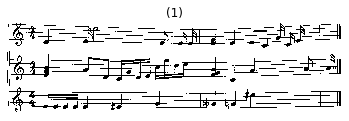

staff removal time:105.26761174201965
getting lines time:0.03963160514831543
getting lines time:0.07457327842712402


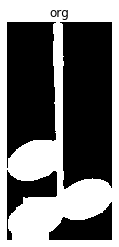

b1f1g1


In [290]:

from  commonfunctions import * 

def chord2text(img,cnt_pos,staffHeight,spaceHeight,lines):
    char_middle = ''
    char_top = ''
    char_down = ''
    height = cnt_pos[1] - cnt_pos[0]
    # show_images([img])
    # print(img.shape)
    if height > 3 * spaceHeight: 
        # height of 3 notes
        # print('cord 3 notes')
        # print(cnt_pos,spaceHeight)
        # show_images([img[:cnt_pos[1]+spaceHeight,:]])
        # space = (img.shape[0] - 3 * spaceHeight -2*staffHeight )//2
        space = spaceHeight
        middle = img[spaceHeight+staffHeight*3//2: 2*(spaceHeight+staffHeight*3//2),:]
        # show_images([img])

        # show_images([img[:spaceHeight+staffHeight,:],middle,img[2*(spaceHeight+staffHeight*3//2)-staffHeight//2:,:]],['top','middle','down'])
        #get top and down
        _, top, distanceTop = getNearestLine(cnt_pos[0],lines)
        _, bottom, distanceBottom = getNearestLine(cnt_pos[0] + spaceHeight+staffHeight*3//2 ,lines)
        char_top = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)

        _, top, distanceTop = getNearestLine(cnt_pos[0] + 2*(spaceHeight+staffHeight*3//2)-staffHeight//2,lines)
        _, bottom, distanceBottom = getNearestLine((cnt_pos[1]),lines)
        char_down = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
        if np.sum(middle) > (middle.shape[0]*middle.shape[1])//2:
            # there's a note in middle 
            # print('middle exists')
            _, top, distanceTop = getNearestLine(cnt_pos[0] + spaceHeight+staffHeight*3//2 ,lines)
            _, bottom, distanceBottom = getNearestLine(cnt_pos[0] + 2*(spaceHeight+staffHeight*3//2),lines)
            char_middle = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
    elif height < 1.5 * spaceHeight:
        # print('cord one note')
        # heigth of 1 note
        # don't think it shoud come here but anyway
        _, top, distanceTop = getNearestLine(cnt_pos[0],lines)
        _, bottom, distanceBottom = getNearestLine(cnt_pos[1],lines)
        char_down = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
    else: 
        # print('cord two notes')
        # show_images([img[:spaceHeight+staffHeight*3//2,:],img[img.shape[0]-spaceHeight-staffHeight*3//2:,:]],['top','down'])
        _, top, distanceTop = getNearestLine(cnt_pos[0],lines)
        _, bottom, distanceBottom = getNearestLine(cnt_pos[0]+ spaceHeight+staffHeight*3//2,lines)
        char_top = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
        _, top, distanceTop = getNearestLine(cnt_pos[1]-spaceHeight-staffHeight*3//2,lines)
        _, bottom, distanceBottom = getNearestLine(cnt_pos[1],lines)
        char_down = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
        # height of 2 notes
    # print(str(char_down) + str(char_middle) + str(char_top))
    return [str(char_down) , str(char_middle) , str(char_top)]
def extract_cnt(cnt_img,staffHeight,spaceHeight):
    chord = cnt_img.copy()
    chord[chord>0] = 1
    # print(chord.shape)
    chord = chord[:,chord.shape[1]//2:]
    idx = np.where(np.sum(chord[:,:staffHeight],axis= 1)>staffHeight//2)
    # print(idx)
    min_y= idx[0][0]
    max_y= idx[0][len(idx[0])-1]
    # print(min_y,max_y)
    # cnt_img = cnt_img[min_y:max_y,:]
    # cnt_img[cnt_img.shape[0]//2,:] = 0
    # show_images([cnt_img])
    return min_y, max_y
def getchordText(cnt_pos,cnt_img,staffHeight,spaceHeight,lines):
    cnt_img[cnt_img > 0]=1 
    temp = binary_dilation(cnt_img[:spaceHeight,:].copy(),np.ones((1,staffHeight)))
    h_hist = np.sum(temp,axis=0)
    bar_idx = np.where(h_hist== np.max(h_hist))[0][0]
    img = cnt_img.copy()
    # print(cnt_img.shape,bar_idx,cnt_img.shape[1]//4)
    if ((bar_idx >  cnt_img.shape[1]//3 ) and (bar_idx < cnt_img.shape[1]*2//3)):
        # print('cord two sides')
        # chord is two sides 
        # show_images([img])
        rh = img[:,:bar_idx] #right half
        # rh = binary_opening(rh.copy(),np.ones((1,rh.shape[1]//2)))
        lh = img[:,bar_idx:] # left half 
        # lh = binary_opening(lh.copy(),np.ones((1,lh.shape[1]//2)))
        # show_images([rh,lh])
        # apply on right half
        min_y ,max_y = extract_cnt(rh,staffHeight,spaceHeight)
        # show_images([rh[min_y:max_y,:]],['two sides Right side'])
        rcnt_pos = [min_y+cnt_pos[0],max_y+cnt_pos[0]]
        text1 = chord2text(rh[min_y:max_y,:],rcnt_pos,staffHeight,spaceHeight,lines)
        #apply on left half
        min_y ,max_y = extract_cnt(lh,staffHeight,spaceHeight)
        # show_images([lh[min_y:max_y,:]],['two sides left side'])
        lcnt_pos = [min_y+cnt_pos[0],max_y+cnt_pos[0]]     
        text2 = chord2text(lh[min_y:max_y,:],lcnt_pos,staffHeight,spaceHeight,lines)
        text1.extend(text2)
        op = []
        for t in text1: 
            if t!= '':
                op.append(t)
        op = sorted(op,key= lambda b:b[0])
        # print(op)
        return "".join(op)
    else:
        # print('cord one side')
        # chor is one side
        min_y ,max_y = extract_cnt(cnt_img,staffHeight,spaceHeight)
        # show_images([cnt_img[min_y:max_y,:]],['one side'])
        cnt_pos = [min_y+cnt_pos[0],max_y+cnt_pos[0]]
        text1 = chord2text(cnt_img[min_y:max_y,:],cnt_pos,staffHeight,spaceHeight,lines)
        op = []
        for t in text1: 
            if t != '':
                op.append(t)
        op = sorted(op,key= lambda b:b[0])
        return "".join(op)

# images = load_images_from_folder("../test_cases/test/")
# images = [cv2.imread('test_cases/printed/17.jpg',0)]
# i = 0
for img in images:
#     start_time = time.time()
#     start = time.time()
#     rotated = rotateImage(img)
# #     show_images([rotated])
#     print('rotation time:' + str(time.time() - start))
    
#     start = time.time()
#     binary = binraization(rotated)//255
#     print('binarization time:' + str(time.time() - start))
    
    show_images([binary])

#     start = time.time()
#     staffHeight, spaceHeight = getRefLengths(binary)
#     print('Ref lengths time:' + str(time.time() - start))
    
#     start = time.time()

#     filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
    
#     filteredImg, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated=[])

    staffLess = (binary-filteredImg).astype(np.uint8)
    
#     plt.imsave('staffless' + str(i) + '.png', staffLess)
#     show_images([staffLess])
    print('staff removal time:' + str(time.time() - start))

    start = time.time()
    lines = getLines(1-filteredImg, staffHeight, spaceHeight)
    # staff = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)
    # staff[lines] = [0,0,255]
#     plt.imsave('staff' + str(i) +'.png', staff)
    print('getting lines time:' + str(time.time() - start))
    time.time()
    lines = getLines(1-filteredImg, staffHeight, spaceHeight)
    # staff = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)
    # staff[lines] = [0,0,255]
#     plt.imsave('staff' + str(i) +'.png', staff)
    print('getting lines time:' + str(time.time() - start))
    
    objects = segmentImage(staffLess, lines, staffHeight, spaceHeight)
    # k = 0 
    # for o in objects:
    #     print(k)
    #     k += 1
    #     show_images([staffLess[o[1]:o[3], o[0]:o[2]]])
        

    ob = objects[30]
   
    #cnt_pos,cnt_img,staffHeight,spaceHeight,lines
    cnt_img = staffLess[ob[1]:ob[3], ob[0]:ob[2]]
    show_images([cnt_img],['org'])
    char = getchordText([ob[1],ob[3]],staffLess[ob[1]:ob[3], ob[0]:ob[2]],staffHeight,spaceHeight,lines)
    print(char)

    i += 1
    # print("time: %s seconds" % (time.time() - start_time))
    # print("---------------------------------------------------------")